In [2]:
import numpy as np
import torch

from ClassifierMetric.utils.plots import plot_class_score
from ClassifierMetric.datamodules.jetnet.datasets import JetNetDataset
from ClassifierMetric.datamodules.jetnet.dataloaders import JetNetDataLoader
from ClassifierMetric.train.trainer import ModelClassifierTest

In [3]:
def evaluate_models(dir, Model, Config, device='cuda:1', tag=None):
    model_dir='/home/df630/ClassifierMetric/results/{}'.format(dir)
    config = Config.load(path=model_dir + "/config.json")
    config.workdir = model_dir
    config.device = device
    config.tag = tag
    classifier = Model(model_config=config)
    datasets = JetNetDataset(dir_path = '/home/df630/ClassifierMetric/data/', 
                            datasets = config.datasets,
                            class_labels = config.labels,
                            max_num_jets = config.max_num_jets,
                            max_num_constituents = config.max_num_constituents,
                            preprocess = config.preprocess,
                            particle_features = config.features,
                            remove_negative_pt = True
                            ) 
    dataloader = JetNetDataLoader(datasets=datasets, data_split_fracs=config.data_split_fracs, batch_size=config.batch_size)
    classifier = ModelClassifierTest(classifier = classifier, 
                                    dataloader = dataloader,
                                    epochs = config.epochs, 
                                    lr = config.lr, 
                                    early_stopping = config.early_stopping,
                                    warmup_epochs = config.warmup_epochs,
                                    workdir = config.workdir,
                                    seed = config.seed)
    classifier.load_model(path=config.workdir + '/best_model.pth')
    classifier.test(class_labels=config.labels)
    return classifier, config


def neg_log_posterior(classifier):
    classifier.predictions.keys()
    nlp={}
    for c in classifier.predictions.keys():
        if c!='datasets' and c>=0:
            pred = classifier.predictions[-1][..., c]
            nlp[c] = - np.log(pred[pred>0]).mean().item()
    return nlp


def scores(ref_class, classifier):
    classifier.predictions.keys()
    scores={}
    for c in classifier.predictions.keys():
        if c !=  'datasets':
            scores[c] = classifier.predictions[c][..., ref_class]
    return scores


# ParticleNet classifier: JetNet150

In [4]:
from ClassifierMetric.models.particlenet import ParticleNet 
from ClassifierMetric.configs.particlenet_config import ParticleNetConfig

classifier_150, config_150 = evaluate_models(dir="ParticleNet.tops.150_2023.09.22_18h09__1", 
                                            Model=ParticleNet,
                                            Config=ParticleNetConfig,
                                            device='cuda:2')

+----------------------+------------------------------------------------------------------------+
| Key                  | Value                                                                  |
+----------------------+------------------------------------------------------------------------+
| data_name            | tops                                                                   |
| features             | ['eta_rel', 'phi_rel', 'pt_rel', 'e_rel', 'R']                         |
| preprocess           | ['standardize']                                                        |
| datasets             | flow_cond: ['fm_tops150_cond_mp200nfe.h5', 'etaphipt']                 |
|                      | diff_cond: ['diff_tops150_cond_midpoint_100_csts.h5', 'etaphipt_frac'] |
|                      | flow_uncond: ['fm_tops150_mp200nfe.h5', 'etaphipt']                    |
|                      | diff_uncond: ['diff_tops150_midpoint_100_csts.h5', 'etaphipt_frac']    |
|                   

2023-09-23 00:09:48.883364: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-23 00:09:49.360090: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


testing:   0%|          | 0/222 [00:00<?, ?it/s]

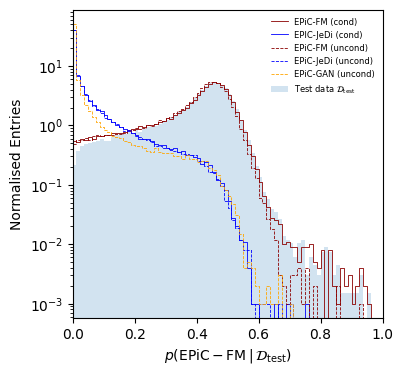

In [5]:
legend_150 = {0 : 'EPiC-FM (cond)', 
              1 : 'EPIC-JeDi (cond)', 
              2 : 'EPiC-FM (uncond)',
              3 : 'EPiC-JeDi (uncond)', 
              4 : 'EPiC-GAN (uncond)', 
             -1 : r'Test data $\mathcal{D}_{\rm test}$'} # test data

color_150 = {0 : 'darkred', 
              1 : 'blue', 
              2 : 'darkred', 
              3 : 'blue', 
              4 : 'orange',
              -1 : None} # test data

plot_class_score(predictions=classifier_150.predictions,
                class_labels=config_150.labels,
                reference='flow_cond',
                figsize=(4,4), 
                xlabel=r'$p({\rm EPiC-FM}\,|\,\mathcal{D}_{\rm test})$',
                xlim=(0.0,1),
                ylog=True,
                bins=np.arange(0.0, 1, 0.0125),
                workdir=config_150.workdir,
                density=True,
                color=color_150,
                lw=0.6,
                legend=legend_150,
                legend_fontsize=6,
                legend_loc='upper right')

In [6]:
nlp = neg_log_posterior(classifier_150)
nlp

{0: 1.0498541593551636,
 1: 4.421981334686279,
 2: 1.0432237386703491,
 3: 4.521755218505859,
 4: 5.106569290161133}

In [13]:
nlp = neg_log_posterior(classifier_150)
nlp

{0: 0.9478577971458435,
 1: 5.668581008911133,
 2: 0.9801816344261169,
 3: 5.704385757446289,
 4: 11.642571449279785}

In [18]:
from ClassifierMetric.models.particlenet import ParticleNet 
from ClassifierMetric.configs.particlenet_config import ParticleNetConfig

classifier_150, config_150 = evaluate_models(dir="ParticleNet.tops.150_2023.08.22_06h42__1", 
                                            Model=ParticleNet,
                                            Config=ParticleNetConfig,
                                            device='cuda:1')

+----------------------+------------------------------------------------------------------------+
| Key                  | Value                                                                  |
+----------------------+------------------------------------------------------------------------+
| data_name            | tops                                                                   |
| features             | ['eta_rel', 'phi_rel', 'pt_rel', 'e_rel', 'R']                         |
| preprocess           | ['standardize']                                                        |
| datasets             | flow_cond: ['fm_tops150_cond_mp200nfe.h5', 'etaphipt']                 |
|                      | diff_cond: ['diff_tops150_cond_midpoint_100_csts.h5', 'etaphipt_frac'] |
|                      | flow_uncond: ['fm_tops150_mp200nfe.h5', 'etaphipt']                    |
|                      | diff_uncond: ['diff_tops150_midpoint_100_csts.h5', 'etaphipt_frac']    |
|                   

	- model 0: flow_cond  [fm_tops150_cond_mp200nfe.h5, etaphipt]  shape: torch.Size([266920, 150, 6])
	- model 1: diff_cond  [diff_tops150_cond_midpoint_100_csts.h5, etaphipt_frac]  shape: torch.Size([266920, 150, 6])
	- model 2: flow_uncond  [fm_tops150_mp200nfe.h5, etaphipt]  shape: torch.Size([266920, 150, 6])
	- model 3: diff_uncond  [diff_tops150_midpoint_100_csts.h5, etaphipt_frac]  shape: torch.Size([266920, 150, 6])
	- model 4: gan_uncond  [gan_tops150_csts.h5, etaphipt_frac]  shape: torch.Size([266920, 150, 6])
	- test : jetnet150  [t150.hdf5, particle_features]  shape: torch.Size([177945, 150, 6])
INFO: building dataloaders...
INFO: train/val/test split ratios: 0.6/0.1/0.3
INFO: train size: 800760, validation size: 133460, testing sizes: 453764


testing:   0%|          | 0/222 [00:00<?, ?it/s]

### Classifier score plot

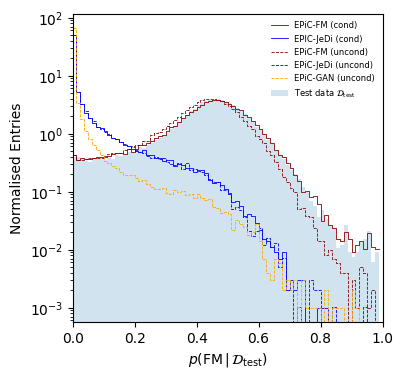

In [14]:
legend_150 = {0 : 'EPiC-FM (cond)', 
              1 : 'EPIC-JeDi (cond)', 
              2 : 'EPiC-FM (uncond)',
              3 : 'EPiC-JeDi (uncond)', 
              4 : 'EPiC-GAN (uncond)', 
             -1 : r'Test data $\mathcal{D}_{\rm test}$'} # test data

color_150 = {0 : 'darkred', 
              1 : 'blue', 
              2 : 'darkred', 
              3 : 'blue', 
              4 : 'orange',
              -1 : None} # test data

plot_class_score(predictions=classifier_150.predictions,
                class_labels=config_150.labels,
                reference='flow_cond',
                figsize=(4,4), 
                xlabel=r'$p({\rm FM}\,|\,\mathcal{D}_{\rm test})$',
                xlim=(0.0,1),
                ylog=True,
                bins=np.arange(0.0, 1, 0.0125),
                workdir=config_150.workdir,
                density=True,
                color=color_150,
                lw=0.6,
                legend=legend_150,
                legend_fontsize=6,
                legend_loc='upper right')


### Log posteriors



In [20]:
nlp = neg_log_posterior(classifier_150)
nlp

{0: 0.947645366191864,
 1: 5.671188831329346,
 2: 0.9800639748573303,
 3: 5.708271503448486,
 4: 11.650605201721191}

In [3]:
from ClassifierMetric.models.particlenet import ParticleNet 
from ClassifierMetric.configs.particlenet_config import ParticleNetConfig

classifier_150_xcheck, config_150_xcheck = evaluate_models(dir="ParticleNet.tops.150_2023.09.04_10h00__1", 
                                            Model=ParticleNet,
                                            Config=ParticleNetConfig,
                                            device='cuda:1')


+----------------------+------------------------------------------------------------------------+
| Key                  | Value                                                                  |
+----------------------+------------------------------------------------------------------------+
| data_name            | tops                                                                   |
| features             | ['eta_rel', 'phi_rel', 'pt_rel', 'e_rel', 'R']                         |
| preprocess           | ['standardize']                                                        |
| datasets             | flow_cond: ['fm_tops150_cond_mp200nfe.h5', 'etaphipt']                 |
|                      | diff_cond: ['diff_tops150_cond_midpoint_100_csts.h5', 'etaphipt_frac'] |
|                      | diff_uncond: ['diff_tops150_midpoint_100_csts.h5', 'etaphipt_frac']    |
|                      | gan_uncond: ['gan_tops150_csts.h5', 'etaphipt_frac']                   |
|                   

2023-09-05 08:30:42.950632: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-05 08:30:43.387727: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


testing:   0%|          | 0/183 [00:00<?, ?it/s]

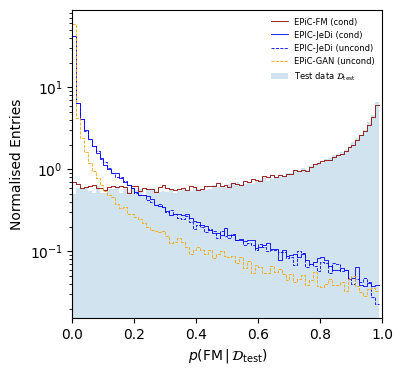

In [4]:


legend_150 = {0 : 'EPiC-FM (cond)', 
              1 : 'EPIC-JeDi (cond)', 
              2 : 'EPIC-JeDi (uncond)', 
              3 : 'EPiC-GAN (uncond)', 
             -1 : r'Test data $\mathcal{D}_{\rm test}$'} # test data

color_150 = {0 : 'darkred', 
              1 : 'blue', 
              2 : 'blue', 
              3 : 'orange',
              -1 : None} # test data

plot_class_score(predictions=classifier_150_xcheck.predictions,
                class_labels=config_150_xcheck.labels,
                reference='flow_cond',
                figsize=(4,4), 
                xlabel=r'$p({\rm FM}\,|\,\mathcal{D}_{\rm test})$',
                xlim=(0.0,1),
                ylog=True,
                bins=np.arange(0.0, 1, 0.0125),
                workdir=config_150_xcheck.workdir,
                density=True,
                color=color_150,
                lw=0.6,
                legend=legend_150,
                legend_fontsize=6,
                legend_loc='upper right')

In [5]:
nlp = neg_log_posterior(classifier_150_xcheck)
nlp

{0: 0.5084977746009827,
 1: 4.2561798095703125,
 2: 4.371120452880859,
 3: 5.762370586395264}

In [8]:
nlp[1] - nlp[0], nlp[2] - nlp[0],  nlp[3] - nlp[0]

(3.74768203496933, 3.8626226782798767, 5.253872811794281)

In [17]:
5.72 - 0.41

5.31

+----------------------+------------------------------------------------------------------------+
| Key                  | Value                                                                  |
+----------------------+------------------------------------------------------------------------+
| data_name            | tops                                                                   |
| features             | ['eta_rel', 'phi_rel', 'pt_rel', 'e_rel', 'R']                         |
| preprocess           | ['standardize']                                                        |
| datasets             | flow_cond: ['fm_tops150_cond_mp200nfe.h5', 'etaphipt']                 |
|                      | diff_cond: ['diff_tops150_cond_midpoint_100_csts.h5', 'etaphipt_frac'] |
|                      | gan_uncond: ['gan_tops150_csts.h5', 'etaphipt_frac']                   |
|                      | jetnet150: ['t150.hdf5', 'particle_features']                          |
| labels            

testing:   0%|          | 0/144 [00:00<?, ?it/s]

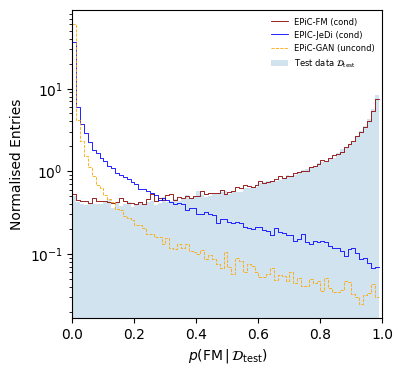

In [51]:
from ClassifierMetric.models.particlenet import ParticleNet 
from ClassifierMetric.configs.particlenet_config import ParticleNetConfig

classifier_150_xcheck, config_150_xcheck = evaluate_models(dir="ParticleNet.tops.150_2023.08.31_10h41__1", 
                                            Model=ParticleNet,
                                            Config=ParticleNetConfig,
                                            device='cuda:0')


legend_150 = {0 : 'EPiC-FM (cond)', 
              1 : 'EPIC-JeDi (cond)', 
              2 : 'EPiC-GAN (uncond)', 
             -1 : r'Test data $\mathcal{D}_{\rm test}$'} # test data

color_150 = {0 : 'darkred', 
              1 : 'blue', 
              2 : 'orange',
              -1 : None} # test data

plot_class_score(predictions=classifier_150_xcheck.predictions,
                class_labels=config_150_xcheck.labels,
                reference='flow_cond',
                figsize=(4,4), 
                xlabel=r'$p({\rm FM}\,|\,\mathcal{D}_{\rm test})$',
                xlim=(0.0,1),
                ylog=True,
                bins=np.arange(0.0, 1, 0.0125),
                workdir=config_150_xcheck.workdir,
                density=True,
                color=color_150,
                lw=0.6,
                legend=legend_150,
                legend_fontsize=6,
                legend_loc='upper right')

In [52]:
nlp = neg_log_posterior(classifier_150_xcheck)
nlp

{0: 0.40589556097984314, 1: 4.111938953399658, 2: 5.715803146362305}

In [53]:
nlp[1] - nlp[0],  nlp[2] - nlp[0]

(3.706043392419815, 5.3099075853824615)

In [1]:
classifier_150.predictions

NameError: name 'classifier_150' is not defined

# ParticleNet classifier: JetNet30

In [7]:
from ClassifierMetric.models.particlenet import ParticleNet 
from ClassifierMetric.configs.particlenet_config import ParticleNetConfig

classifier_30, config_30 = evaluate_models(dir="ParticleNet.tops.30_2023.09.22_18h07__1", 
                                            Model=ParticleNet,
                                            Config=ParticleNetConfig,
                                            device='cuda:0')

+----------------------+-----------------------------------------------------------------------+
| Key                  | Value                                                                 |
+----------------------+-----------------------------------------------------------------------+
| data_name            | tops                                                                  |
| features             | ['eta_rel', 'phi_rel', 'pt_rel', 'e_rel', 'R']                        |
| preprocess           | ['standardize']                                                       |
| datasets             | flow_cond: ['fm_tops30_cond_mp200nfe.h5', 'etaphipt']                 |
|                      | diff_cond: ['diff_tops30_cond_midpoint_100_csts.h5', 'etaphipt_frac'] |
|                      | pc_diff_cond: ['pc_tops30_em_200_csts.h5', 'etaphipt_frac']           |
|                      | flow_uncond: ['fm_tops30_mp200nfe.h5', 'etaphipt']                    |
|                      | diff_

testing:   0%|          | 0/261 [00:00<?, ?it/s]

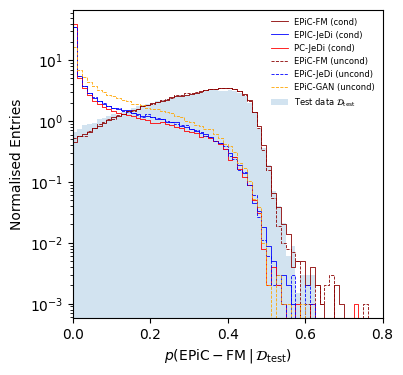

In [8]:
legend_30 = {0 : 'EPiC-FM (cond)', 
              1 : 'EPIC-JeDi (cond)', 
              2 : 'PC-JeDi (cond)',
              3 : 'EPiC-FM (uncond)',
              4 : 'EPiC-JeDi (uncond)', 
              5 : 'EPiC-GAN (uncond)', 
             -1 : r'Test data $\mathcal{D}_{\rm test}$'} # test data

color_30 = {0 : 'darkred', 
              1 : 'blue', 
              2 : 'red', 
              3 : 'darkred', 
              4 : 'blue' ,
              5: 'orange',
              -1 : None} # test data

plot_class_score(predictions=classifier_30.predictions,
                class_labels=config_30.labels,
                reference='flow_cond',
                figsize=(4,4), 
                xlabel=r'$p({\rm EPiC-FM}\,|\,\mathcal{D}_{\rm test})$',
                xlim=(0.0,0.8),
                ylog=True,
                bins=np.arange(0.0, 0.8, 0.0125),
                workdir=config_30.workdir,
                density=True,
                color=color_30,
                lw=0.6,
                legend=legend_30,
                legend_fontsize=6,
                legend_loc='upper right')

In [9]:
neg_log_posterior(classifier_30)

{0: 1.4099676609039307,
 1: 3.0119454860687256,
 2: 3.0511693954467773,
 3: 1.3742527961730957,
 4: 3.021843194961548,
 5: 3.2620480060577393}

In [12]:
neg_log_posterior(classifier_30)

{0: 1.4022032022476196,
 1: 2.9297032356262207,
 2: 2.9031169414520264,
 3: 1.4437663555145264,
 4: 3.020820140838623,
 5: 2.7018890380859375}

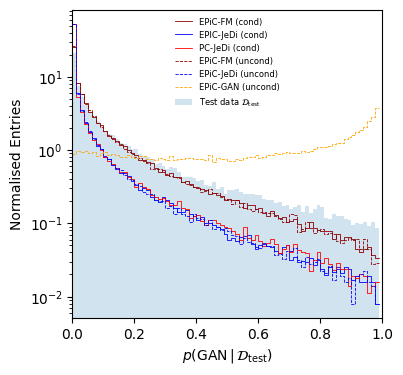

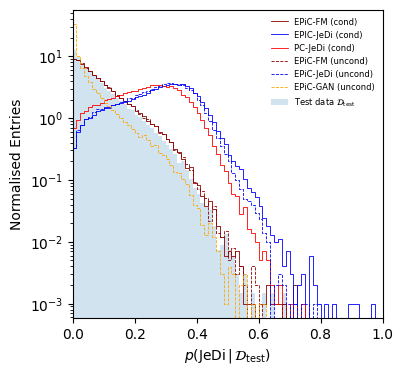

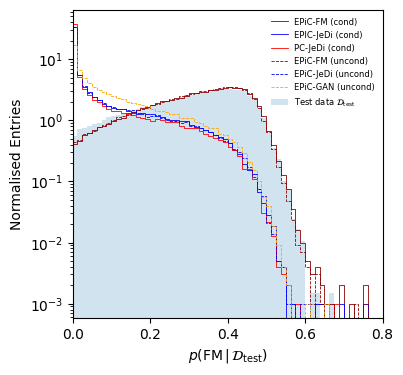

In [8]:
legend_30 = {0 : 'EPiC-FM (cond)', 
              1 : 'EPIC-JeDi (cond)', 
              2 : 'PC-JeDi (cond)',
              3 : 'EPiC-FM (uncond)',
              4 : 'EPiC-JeDi (uncond)', 
              5 : 'EPiC-GAN (uncond)', 
             -1 : r'Test data $\mathcal{D}_{\rm test}$'} # test data

color_30 = {0 : 'darkred', 
              1 : 'blue', 
              2 : 'red', 
              3 : 'darkred', 
              4 : 'blue' ,
              5: 'orange',
              -1 : None} # test data


plot_class_score(predictions=classifier_30.predictions,
                class_labels=config_30.labels,
                reference='gan_uncond',
                figsize=(4,4), 
                xlabel=r'$p({\rm GAN}\,|\,\mathcal{D}_{\rm test})$',
                xlim=(0.0,1),
                ylog=True,
                bins=np.arange(0.0, 1, 0.0125),
                workdir=config_30.workdir,
                density=True,
                color=color_30,
                lw=0.6,
                legend=legend_30,
                legend_fontsize=6,
                legend_loc='upper center')


plot_class_score(predictions=classifier_30.predictions,
                class_labels=config_30.labels,
                reference='diff_cond',
                figsize=(4,4), 
                xlabel=r'$p({\rm JeDi}\,|\,\mathcal{D}_{\rm test})$',
                xlim=(0.0,1),
                ylog=True,
                bins=np.arange(0.0, 1, 0.0125),
                workdir=config_30.workdir,
                density=True,
                color=color_30,
                lw=0.6,
                legend=legend_30,
                legend_fontsize=6,
                legend_loc='upper right')


plot_class_score(predictions=classifier_30.predictions,
                class_labels=config_30.labels,
                reference='flow_cond',
                figsize=(4,4), 
                xlabel=r'$p({\rm FM}\,|\,\mathcal{D}_{\rm test})$',
                xlim=(0.0,0.8),
                ylog=True,
                bins=np.arange(0.0, 0.8, 0.0125),
                workdir=config_30.workdir,
                density=True,
                color=color_30,
                lw=0.6,
                legend=legend_30,
                legend_fontsize=6,
                legend_loc='upper right')

In [11]:
neg_log_posterior(classifier_30)

{0: 1.3497605323791504,
 1: 3.0996644496917725,
 2: 3.0799384117126465,
 3: 1.3752442598342896,
 4: 3.106818437576294,
 5: 3.4326529502868652}

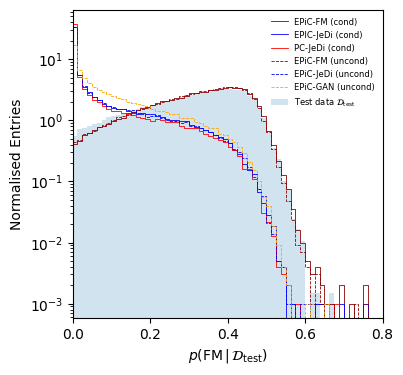

In [15]:
plot_class_score(predictions=classifier_30.predictions,
                class_labels=config_30.labels,
                reference='flow_cond',
                figsize=(4,4), 
                xlabel=r'$p({\rm FM}\,|\,\mathcal{D}_{\rm test})$',
                xlim=(0.0,0.8),
                ylog=True,
                bins=np.arange(0.0, 0.8, 0.0125),
                workdir=config_30.workdir,
                density=True,
                color=color_30,
                lw=0.6,
                legend=legend_30,
                legend_fontsize=6,
                legend_loc='upper right')